In [4]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

In [5]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


In [ ]:
# Evaluate all lenght data using histagrams

In [6]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

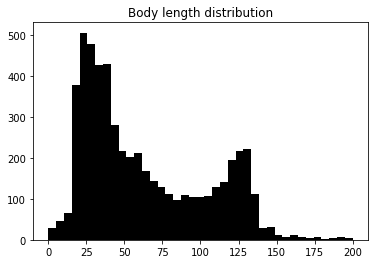

In [9]:
bins = np.linspace(0, 200, 40) # Crate 40 bins

plt.hist(data['body_len'], bins, color = 'black')
plt.title('Body length distribution')
plt.show()

Look's correct. Since spam use to have longer text, and nonspam shorter
we can see a lot of text between 0 and 50 - this will be our nonspam.

Results over 100 seems to belong to spam category.

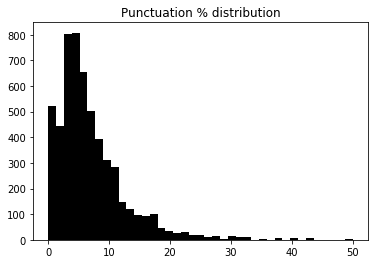

In [10]:
bins = np.linspace(0, 50, 40) # Crate 40 bins, but max will b 50

plt.hist(data['punct%'], bins, color = 'black')
plt.title('Punctuation % distribution')
plt.show()

This chart looks odd. Most of the data is located near zero. We also can see some outliners.

In [12]:
# Box-Cox Power Transformation

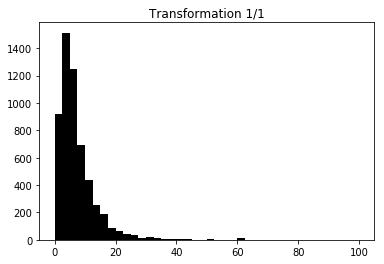

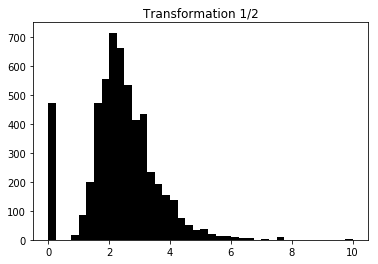

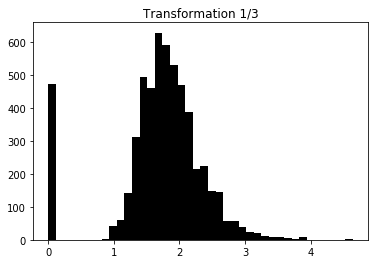

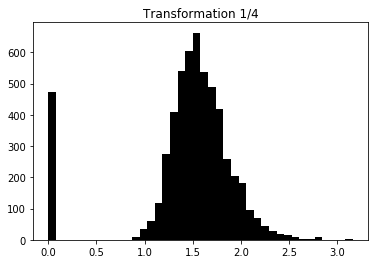

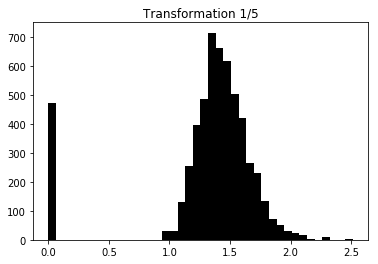

In [22]:

for i in [1, 2, 3, 4, 5]: # Check some transformations using for loop, to see which one will be the best
    plt.hist((data['punct%']) ** (1/i),
             bins = 40, color = 'black') # Loop through 5 numbers to get different transformations, for example 1/1, 1/2 and so on
    plt.title('Transformation 1/{}'.format(str(i))) # Add the title based on transformation function
    plt.show()

As we can see on the charts best transformation will be either 1/4 or 1/5